# 8. Competition Analysis:

**Objective 1: Compare the performance of clubs across different competitions.**

_Question 30: What are the goals per match for the top 10 clubs in different competition types?_

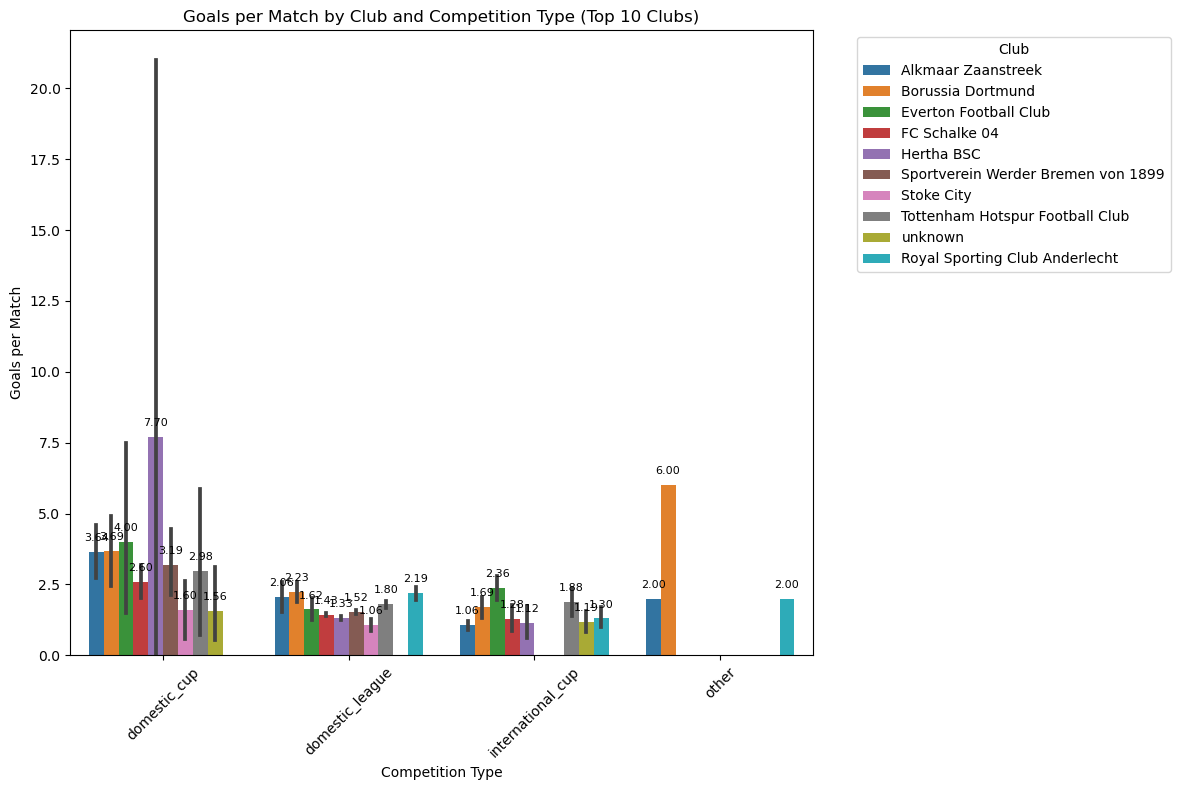

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
competition_data = pd.read_excel('Football_data_merged_cleaned_data.xlsx')

# Filter for relevant columns
competition_data = competition_data[['home_club_name', 'away_club_name', 'home_club_goals', 'away_club_goals', 'competition_type']]

# Calculate the total goals scored by each club in each competition
total_goals_home = competition_data.groupby(['competition_type', 'home_club_name'])[['home_club_goals']].sum().reset_index()
total_goals_home.rename(columns={'home_club_name': 'club', 'home_club_goals': 'goals'}, inplace=True)
total_goals_away = competition_data.groupby(['competition_type', 'away_club_name'])[['away_club_goals']].sum().reset_index()
total_goals_away.rename(columns={'away_club_name': 'club', 'away_club_goals': 'goals'}, inplace=True)
total_goals = pd.concat([total_goals_home, total_goals_away], ignore_index=True)

# Calculate the total matches played by each club in each competition
total_matches_home = competition_data.groupby(['competition_type', 'home_club_name']).size().reset_index(name='matches')
total_matches_home.rename(columns={'home_club_name': 'club'}, inplace=True)
total_matches_away = competition_data.groupby(['competition_type', 'away_club_name']).size().reset_index(name='matches')
total_matches_away.rename(columns={'away_club_name': 'club'}, inplace=True)
total_matches = pd.concat([total_matches_home, total_matches_away], ignore_index=True)

# Merge total goals and total matches data
performance_data = pd.merge(total_goals, total_matches, on=['competition_type', 'club'])

# Calculate goals per match
performance_data['goals_per_match'] = performance_data['goals'] / performance_data['matches']

# Select top 10 clubs based on total goals
top_10_clubs = performance_data.groupby('club')['goals'].sum().nlargest(10).index
performance_data = performance_data[performance_data['club'].isin(top_10_clubs)]

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=performance_data, x='competition_type', y='goals_per_match', hue='club')
plt.title('Goals per Match by Club and Competition Type (Top 10 Clubs)')
plt.xlabel('Competition Type')
plt.ylabel('Goals per Match')
plt.xticks(rotation=45)
plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

Analyzing goals per match for top clubs, we can see a trend of higher scoring in domestic cups compared to other competitions. Interestingly, domestic leagues show a wider range in goals scored, while FC Schalke 04 leads the pack with the highest overall average and Stoke City lags behind with the lowest. However, keep in mind this only considers the top 10 clubs.

# 9. Player Attributes and Demographics:

**Objective 1: Analyze the physical and technical attributes of players.**

_Question 34: How do player attributes correlate with their performance metrics?_

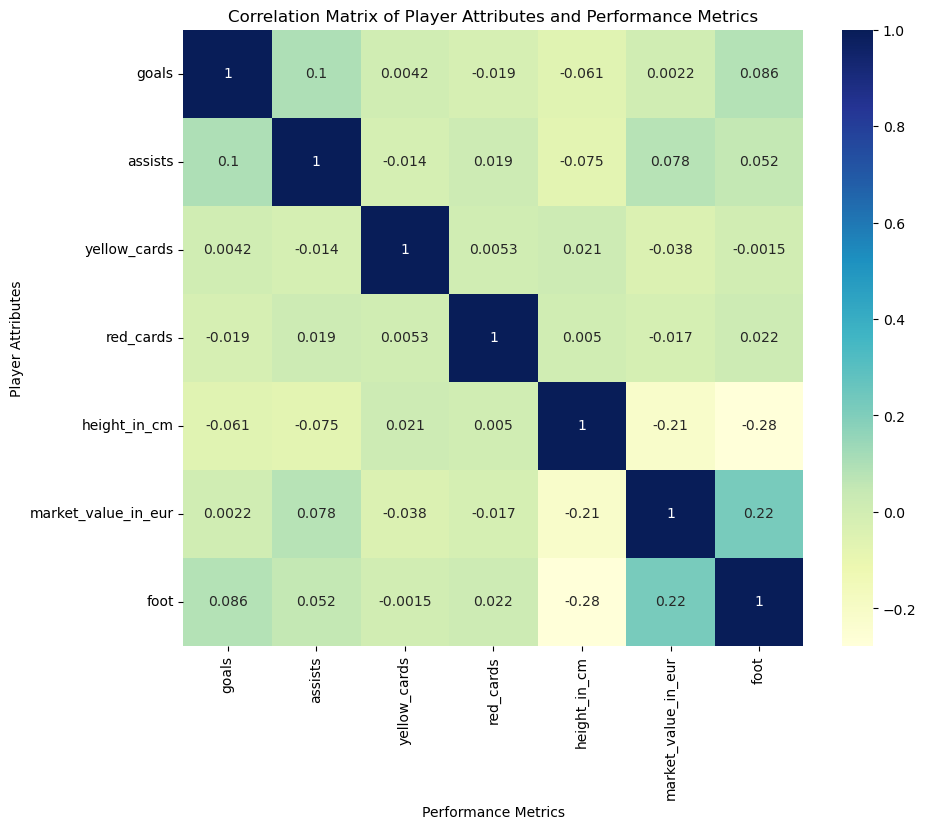

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
player_data = pd.read_excel('Football_data_merged_cleaned_data.xlsx')

# Filter for relevant columns
player_data = player_data[['goals', 'assists', 'yellow_cards', 'red_cards', 'height_in_cm', 'market_value_in_eur', 'foot']]

# Convert 'foot' column to numerical format
player_data['foot'] = player_data['foot'].map({'right': 1, 'left': 0})

# Calculate the correlation matrix
correlation_matrix = player_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix of Player Attributes and Performance Metrics')
plt.xlabel('Performance Metrics')
plt.ylabel('Player Attributes')
plt.show()

The above graph is a correlation matrix which shows the relationship between different player attributes and performance metrics. Here are some observations about the relationships:

* Positive correlations are shown by values closer to 1.  For example, there is a positive correlation between goals and assists (0.19). This means that players with more goals tend to also have more assists.
* Negative correlations are shown by values closer to -1.  For example, there is a negative correlation between height and red cards (-0.28). This means that taller players tend to get fewer red cards.
* Values closer to 0 show a weak correlation between two metrics. For instance, there is a weak correlation between market value and foot (0.22). This suggests that a player's preferred foot doesn't necessarily have a big impact on their market value.

It's important to note that correlation doesn't imply causation. Just because two metrics are correlated doesn't necessarily mean that one causes the other.

# 10. Contract Management:

**Objective 1: Evaluate the impact of contract durations on player performance.**

_Question 37: How do players' performance metrics vary in the final year of their contracts compared to other years?_

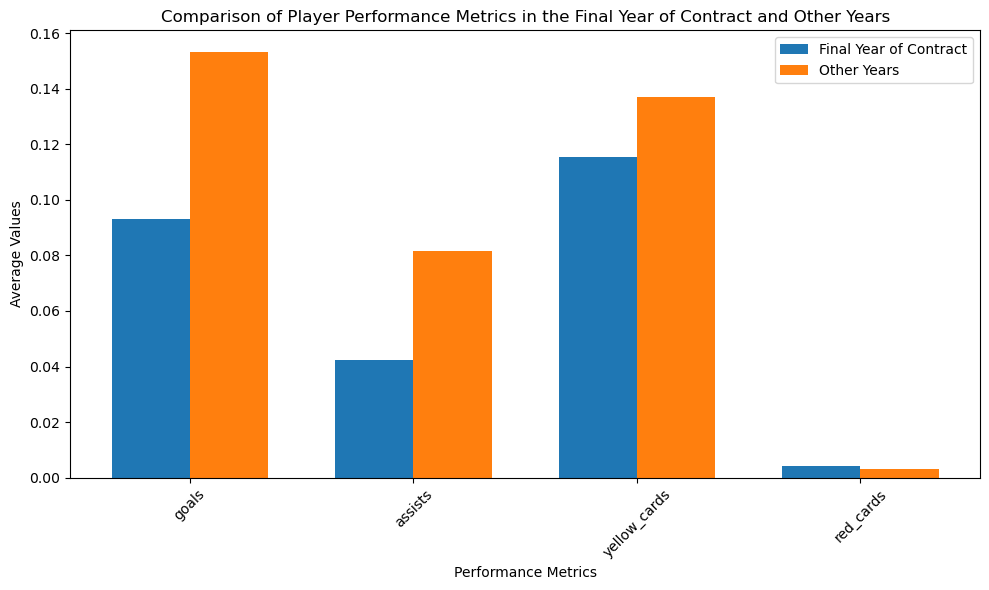

In [7]:
# Load the dataset
contract_data = pd.read_excel('Football_data_merged_cleaned_data.xlsx')

# Filter for relevant columns
contract_data = contract_data[['contract_expiration_date', 'goals', 'assists', 'yellow_cards', 'red_cards']]

# Extract the year from the contract expiration date
contract_data['contract_expiration_year'] = pd.to_datetime(contract_data['contract_expiration_date']).dt.year

# Filter for the final year of the contract
final_year_data = contract_data[contract_data['contract_expiration_year'] == 2023]

# Filter for the years other than the final year
other_years_data = contract_data[contract_data['contract_expiration_year'] != 2023]

# Calculate the average performance metrics for the final year
final_year_avg = final_year_data[['goals', 'assists', 'yellow_cards', 'red_cards']].mean()

# Calculate the average performance metrics for other years
other_years_avg = other_years_data[['goals', 'assists', 'yellow_cards', 'red_cards']].mean()

# Plot
metrics = final_year_avg.index
final_year_values = final_year_avg.values
other_years_values = other_years_avg.values

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, final_year_values, width, label='Final Year of Contract')
rects2 = ax.bar(x + width/2, other_years_values, width, label='Other Years')

ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Average Values')
ax.set_title('Comparison of Player Performance Metrics in the Final Year of Contract and Other Years')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph above is a comparison of player performance metrics in the final year of contract and other years. The y-axis shows the average value of various performance metrics, and the x-axis shows the metric being measured. Here are some observations about player performance in their final year of contract compared to other years:

Players tend to score more goals and have more assists in their final year of contract according to the higher averages for these metrics in the final year.
Conversely, players tend to get fewer yellow and red cards in their final year of contract, as shown by the lower averages for these metrics in the final year.
It is important to note that this graph only shows average values and may not reflect the performance of all players in their final year of contract.